In [372]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")


In [318]:
# the data
fetal = pd.read_csv("fetal_health.csv")

fetal.head(5)


# Normal - 1
# Suspect - 2
# Pathological - 3

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [244]:
fetal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [245]:
## clean clean!!

# checking for all the correlations
fetal.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [319]:
## duplicate the df, so i can change health_fetal to have only 2 options and test if it improves it

fetal2 = fetal.copy(deep=True)

In [320]:
fetal2["fetal_health"].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [321]:
# trying with only to options for the target
fetal2["fetal_health"] = fetal2["fetal_health"].replace(3,2)
fetal2["fetal_health"].value_counts()


1.0    1655
2.0     471
Name: fetal_health, dtype: int64

In [322]:
#confirming fetal still has the 3 classifications
fetal["fetal_health"].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [285]:
#checking direct correlations
fetal[fetal["abnormal_short_term_variability"] < 30]["fetal_health"]

1       1.0
2       1.0
3       1.0
4       1.0
5       3.0
       ... 
1593    1.0
1594    1.0
1595    1.0
1601    1.0
1603    1.0
Name: fetal_health, Length: 452, dtype: float64

From now: 1 = healthy, 2 = suspicious or pathological

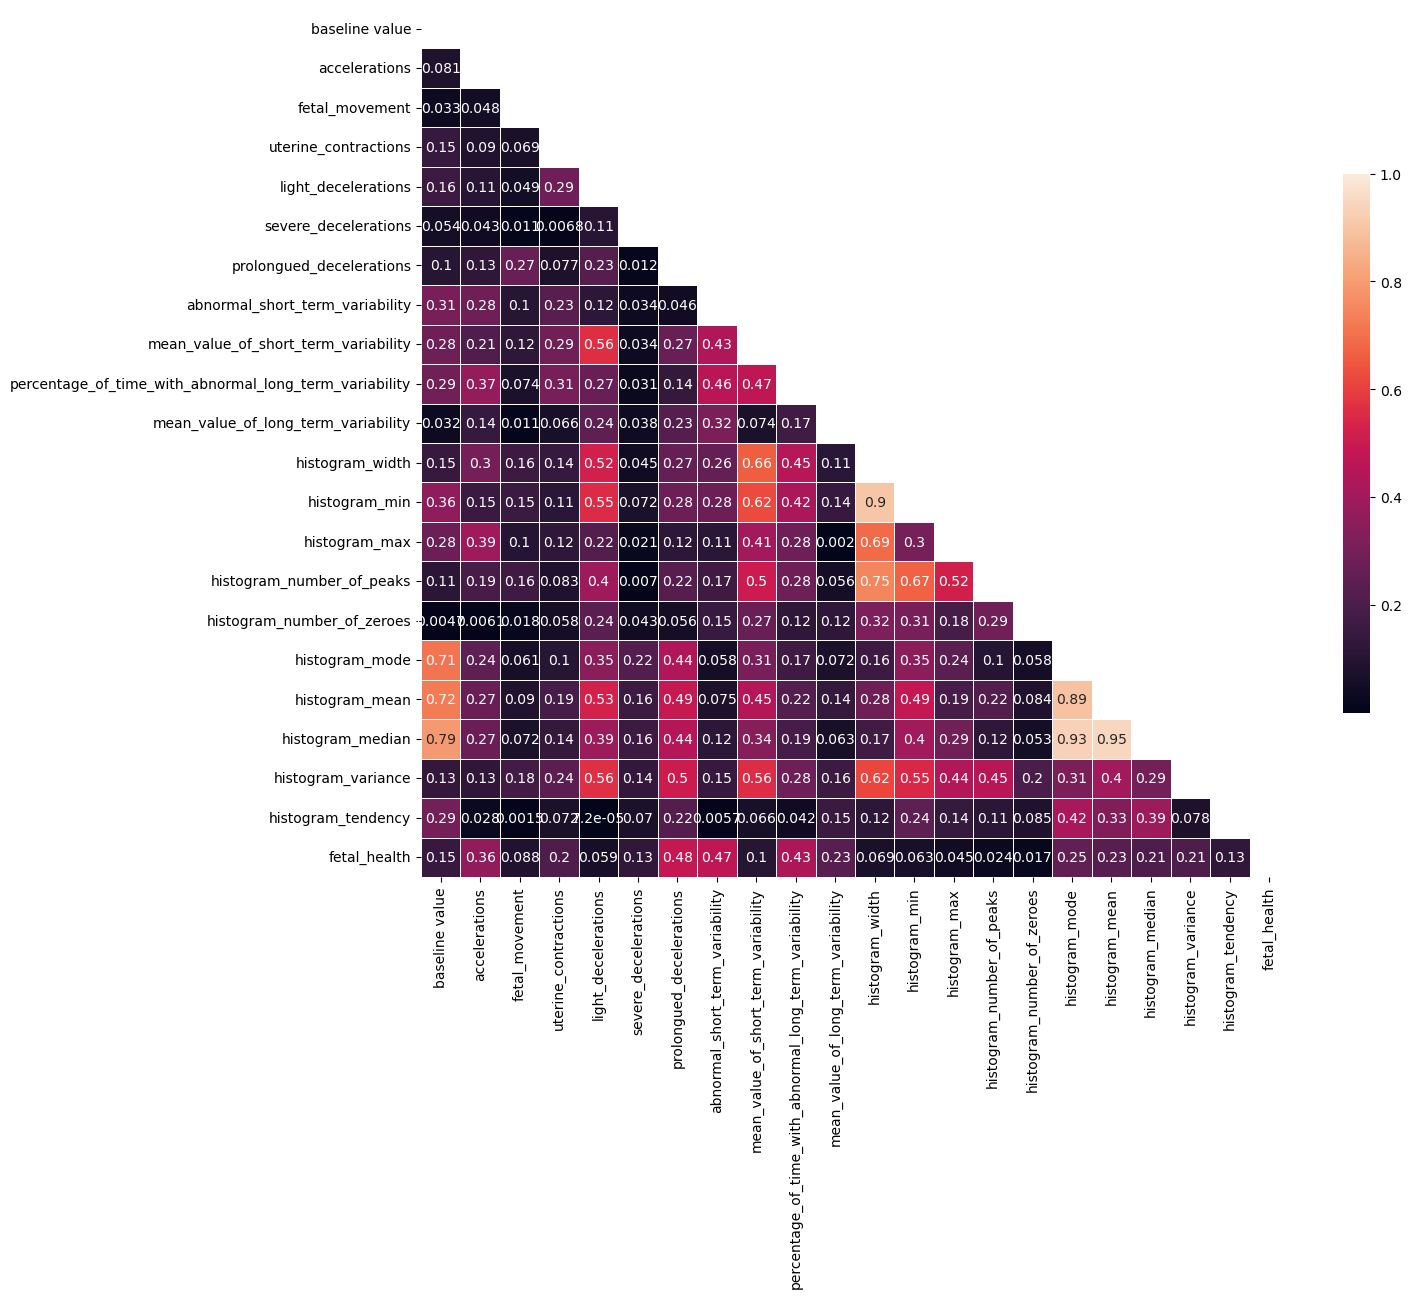

In [250]:
## corelations of the originial

corr=np.abs(fetal.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

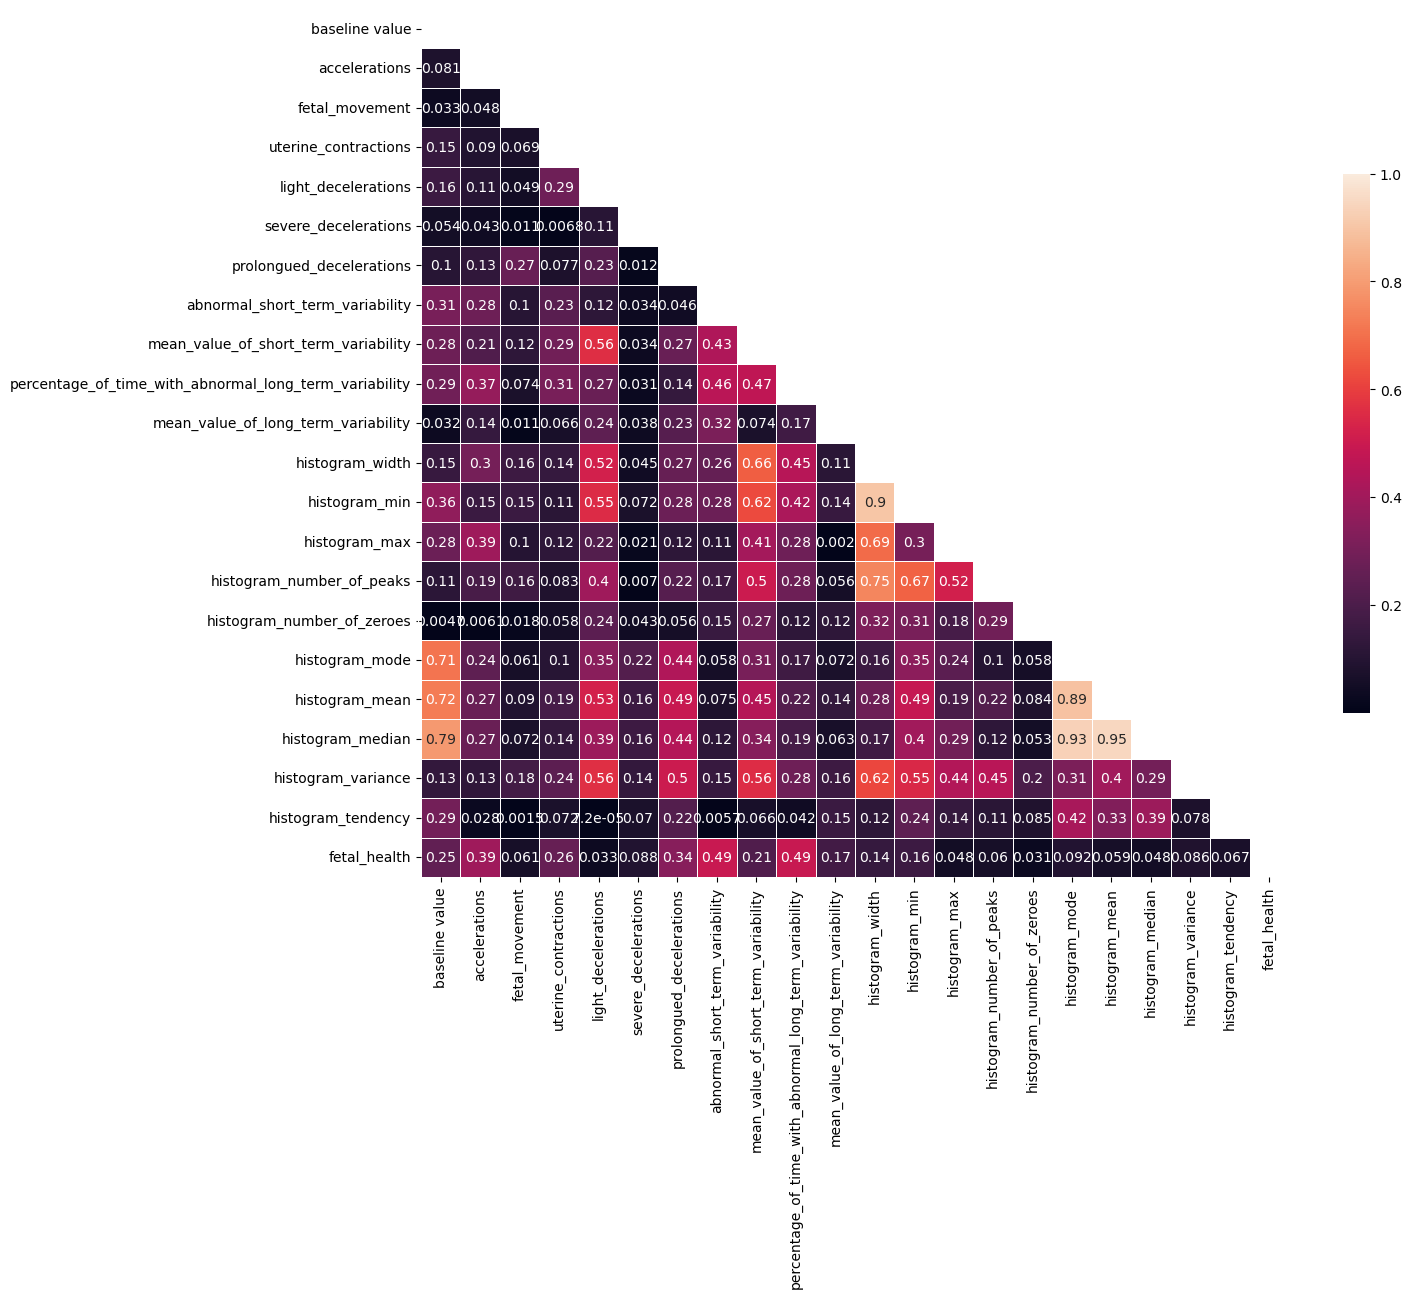

In [251]:
## correlations of fetal2

corr=np.abs(fetal2.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

The columns most related to fetal health are: - percentage of time with abnormal long term variability (0.49)
                                              - abnormal short term variability (0.49)
                                              - accelarations (0.39)
                                              - prolongued decelerations (0.34)
                                              - uterine contractions (0.26)
                                              - baseline value (0.25)
                                              - mean value of short term variability (0.21)
                                              - mean value of long term variability (0.17)
                                              - histogram min (0.16)
                                              - histogram width (0.14)

 --> from 22 to 10 columns

In [323]:
## a table with only those columns:
# attempted with 10 columns and with 6 columns

fetal2_10 = fetal2.drop(["fetal_movement", "light_decelerations", "severe_decelerations", "histogram_max", "histogram_number_of_peaks", "histogram_number_of_zeroes", "histogram_mode", "histogram_mean", "histogram_median", "histogram_variance", "histogram_tendency"], axis = 1)

fetal2_6 = fetal2_10.drop(["histogram_min", "histogram_width", "mean_value_of_long_term_variability", "mean_value_of_short_term_variability"], axis = 1)
fetal2_6.head(5)

fetal_10 = fetal.drop(["fetal_movement", "light_decelerations", "severe_decelerations", "histogram_max", "histogram_number_of_peaks", "histogram_number_of_zeroes", "histogram_mode", "histogram_mean", "histogram_median", "histogram_variance", "histogram_tendency"], axis = 1)

fetal_6 = fetal_10.drop(["histogram_min", "histogram_width", "mean_value_of_long_term_variability", "mean_value_of_short_term_variability"], axis = 1)

fetal_6["fetal_health"].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [328]:
# and trying with 5 columns too, because 2 of the columns are similiar
fetal_5 = fetal_6.drop("percentage_of_time_with_abnormal_long_term_variability", axis = 1)
fetal2_5 = fetal2_6.drop("percentage_of_time_with_abnormal_long_term_variability", axis = 1)

In [375]:
fetal_5

,baseline value,accelerations,uterine_contractions,prolongued_decelerations,abnormal_short_term_variability,fetal_health
0,120.0,0.000,0.000,0.0,73.0,2.0
1,132.0,0.006,0.006,0.0,17.0,1.0
2,133.0,0.003,0.008,0.0,16.0,1.0
3,134.0,0.003,0.008,0.0,16.0,1.0
4,132.0,0.007,0.008,0.0,16.0,1.0
...,...,...,...,...,...,...
2121,140.0,0.000,0.007,0.0,79.0,2.0
2122,140.0,0.001,0.007,0.0,78.0,2.0
2123,140.0,0.001,0.007,0.0,79.0,2.0
2124,140.0,0.001,0.006,0.0,78.0,2.0


In [330]:
# fetal_5
features_5 = fetal_5.drop("fetal_health", axis = 1)
target_5 = fetal_5["fetal_health"]

# fetal2_5
features2_5 = fetal2_5.drop("fetal_health", axis = 1)
target2_5 = fetal2_5["fetal_health"]


X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(features_5, target_5, test_size = 0.2)

X_train2_5, X_test2_5, y_train2_5, y_test2_5 = train_test_split(features2_5, target2_5, test_size = 0.2)

In [253]:
fetal2_6["fetal_health"].value_counts()

1.0    1655
2.0     471
Name: fetal_health, dtype: int64

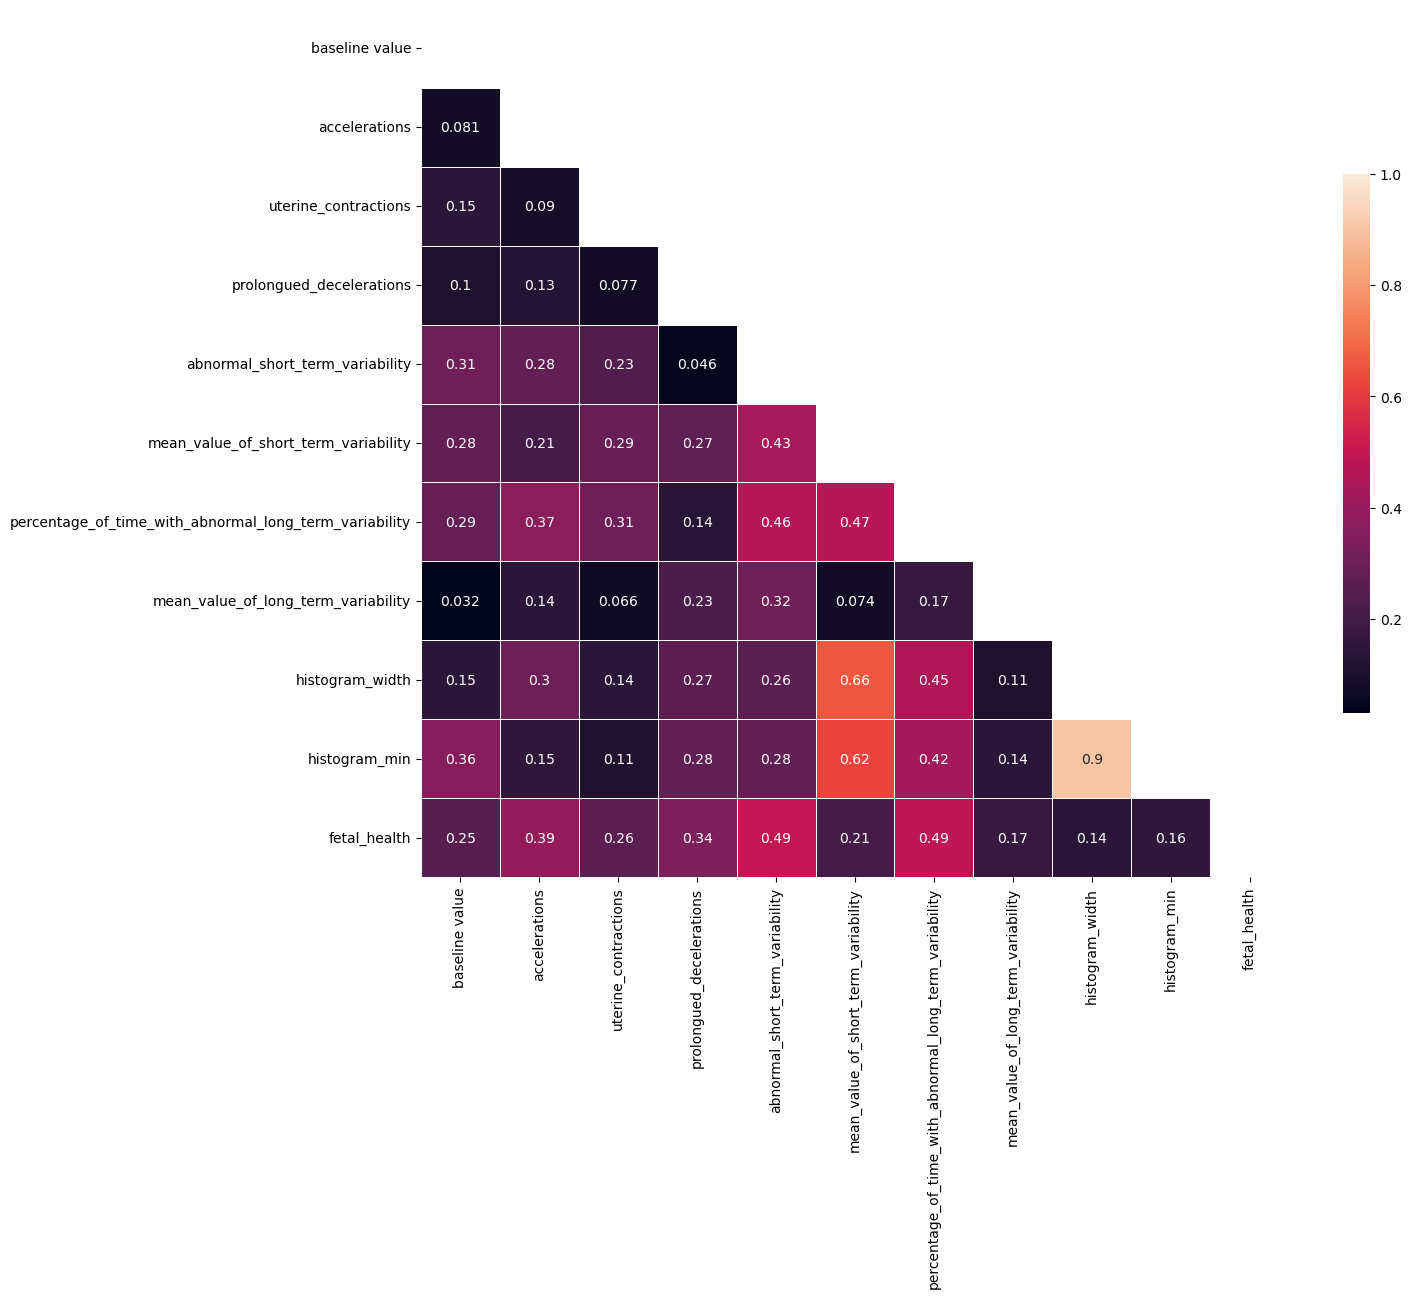

In [254]:
## correlations of fetal2_10

corr=np.abs(fetal2_10.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

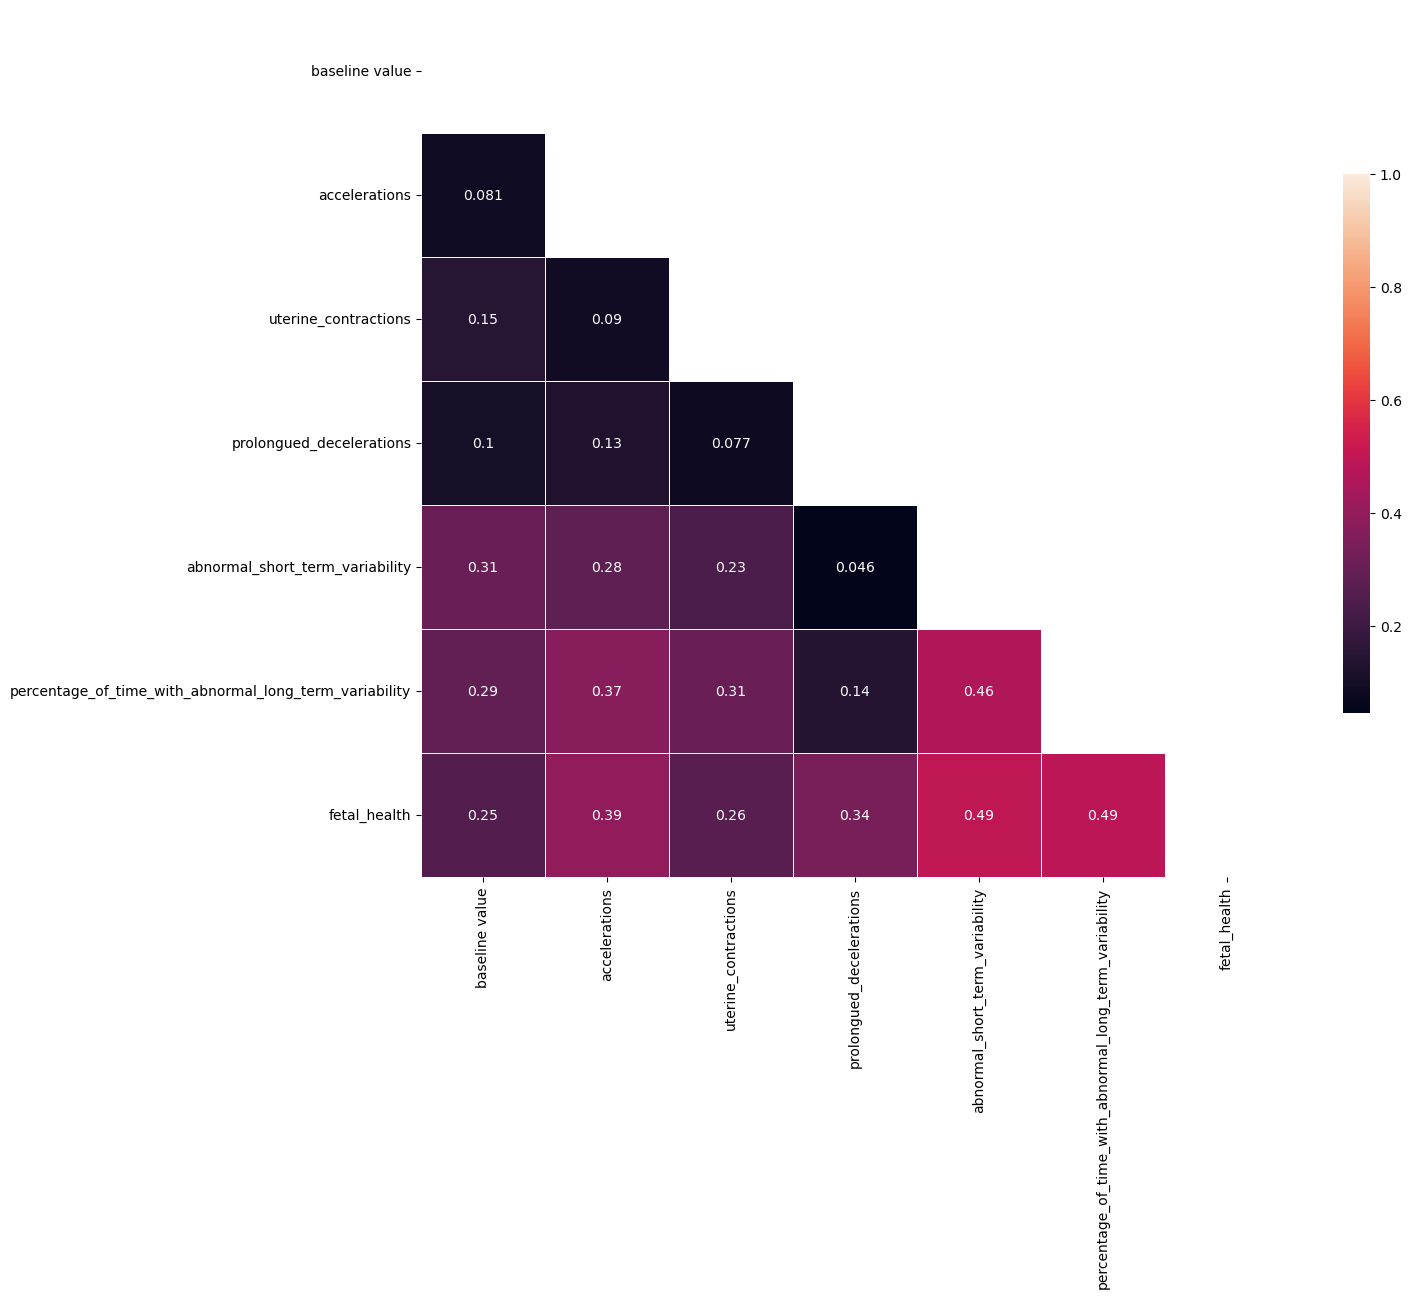

In [324]:
## correlations of fetal2_6

corr=np.abs(fetal2_6.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

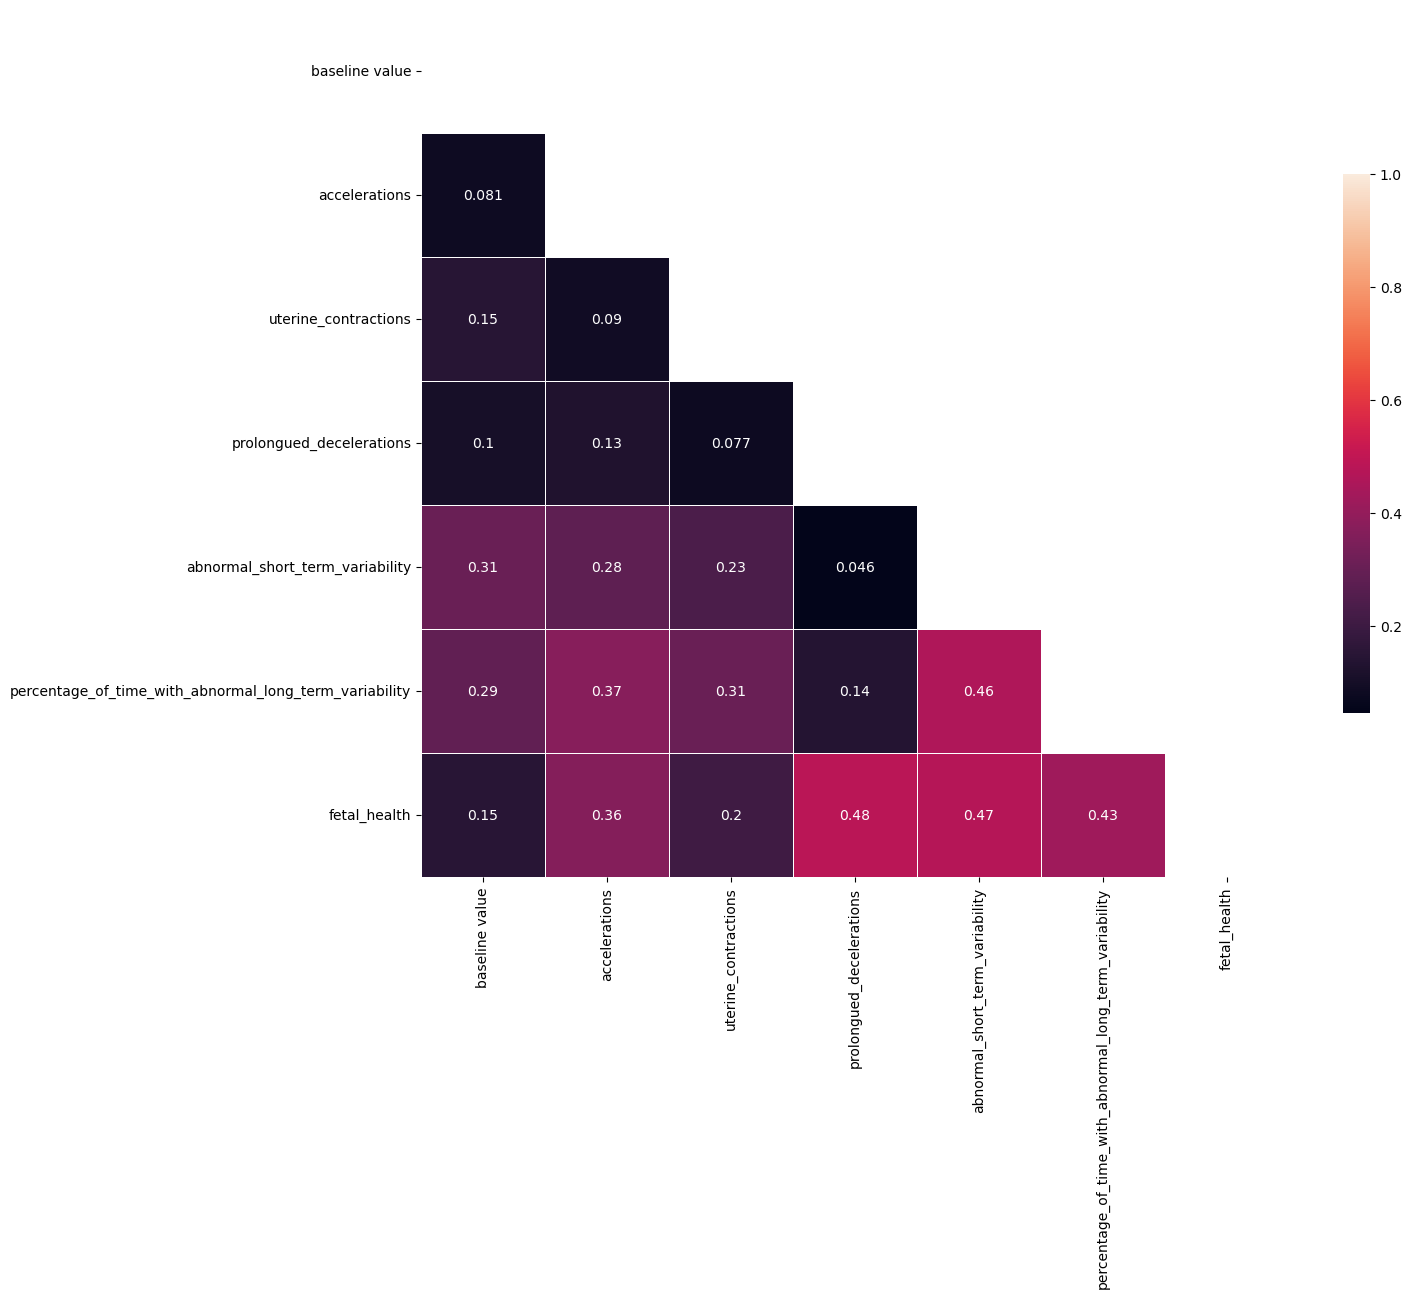

In [303]:
## correlations of fetal_6

corr=np.abs(fetal_6.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

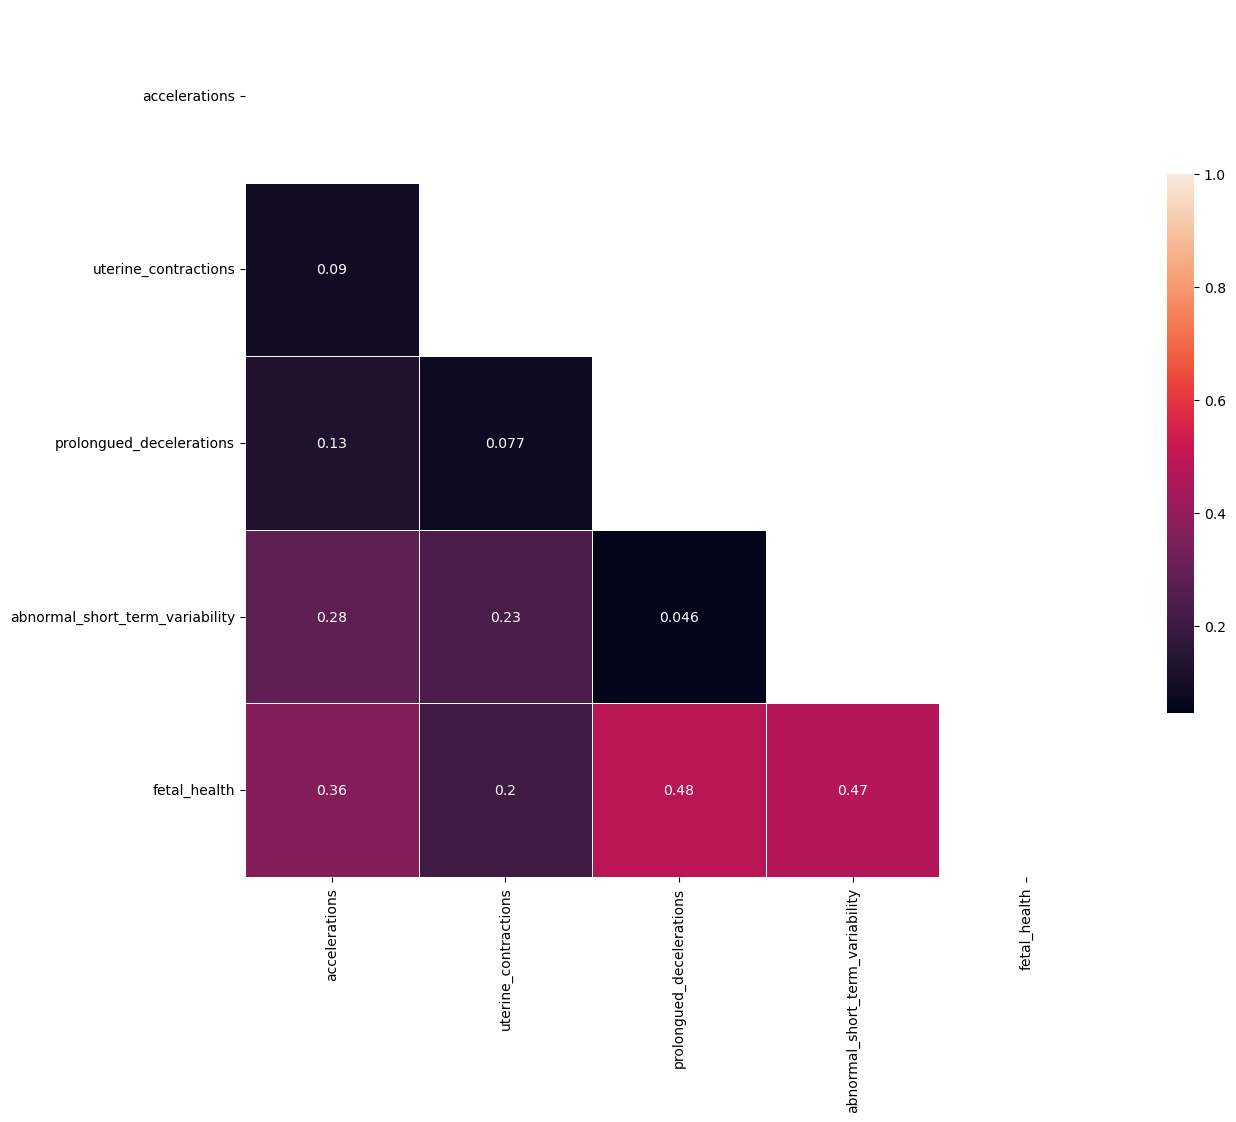

In [326]:
## correlations of fetal_5

corr=np.abs(fetal_5.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

fetal - original
fetal2 - only 2 fetal healths

fetal2 - 2 fetal health and 10 columns.


--> CLassification MODELS:
        - KNN
        - logistic regression
        - decision trees
        - Naive Bayes Classification
        - Support Vector Machine

In [327]:
## train_test_splits

# fetal
features = fetal.drop("fetal_health", axis = 1)
target = fetal["fetal_health"]

# fetal 2
features2 = fetal2.drop("fetal_health", axis = 1)
target2 = fetal2["fetal_health"]

# fetal 2_10
features2_10 = fetal2_10.drop("fetal_health", axis = 1)
target2_10 = fetal2_10["fetal_health"]

# fetal 2_6
features2_6 = fetal2_6.drop("fetal_health", axis = 1)
target2_6 = fetal2_6["fetal_health"]

# fetal_10
features_10 = fetal_10.drop("fetal_health", axis = 1)
target_10 = fetal_10["fetal_health"]

# fetal_6
features_6 = fetal_6.drop("fetal_health", axis = 1)
target_6 = fetal_6["fetal_health"]


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(features2, target2, test_size = 0.2)

X_train2_10, X_test2_10, y_train2_10, y_test2_10 = train_test_split(features2_10, target2_10, test_size = 0.2)

X_train2_6, X_test2_6, y_train2_6, y_test2_6 = train_test_split(features2_6, target2_6, test_size = 0.2)

X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(features_10, target_10, test_size = 0.2)

X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(features_6, target_6, test_size = 0.2)


In [257]:
## trying some models

## KNN's

# fetal
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
print("The score for fetal with Knn classifier model is: ", knn.score(X_test, y_test))

# fetal2
knn2 = KNeighborsClassifier(n_neighbors = 10)
knn2.fit(X_train2, y_train2)
print("The score for fetal2 with Knn calssifier model is: ", knn2.score(X_test2, y_test2))

# fetal2_10
knn2_10 = KNeighborsClassifier(n_neighbors = 10)
knn2_10.fit(X_train2_10, y_train2_10)
print("The score for fetal2_10 with Knn classifier model is: ", knn2_10.score(X_test2_10, y_test2_10))

# fetal2_6
knn2_6 = KNeighborsClassifier(n_neighbors = 10)
knn2_6.fit(X_train2_6, y_train2_6)
print("The score for fetal2_6 with Knn classifier model is: ", knn2_6.score(X_test2_6, y_test2_6))

# fetal_10
knn_10 = KNeighborsClassifier(n_neighbors = 10)
knn_10.fit(X_train_10, y_train_10)
print("The score for fetal_10 with Knn classifier model is: ", knn_10.score(X_test_10, y_test_10))

# fetal_6
knn_6 = KNeighborsClassifier(n_neighbors = 10)
knn_6.fit(X_train_6, y_train_6)
print("The score for fetal_6 with Knn classifier model is: ", knn_6.score(X_test_6, y_test_6))

The score for fetal with Knn classifier model is:  0.8967136150234741
The score for fetal2 with Knn calssifier model is:  0.903755868544601
The score for fetal2_10 with Knn classifier model is:  0.8896713615023474
The score for fetal2_6 with Knn classifier model is:  0.8943661971830986
The score for fetal_10 with Knn classifier model is:  0.892018779342723
The score for fetal_6 with Knn classifier model is:  0.892018779342723


In [258]:
## im going to check if the numer of neighbours can change it

## fetal
test_score = []
for i in range(2, 30, 3):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    test_score.append(score)
    
test_score

# 3: 90%, 50: 87
## the best number of neighbors here seems to be 6


[0.8943661971830986,
 0.8849765258215962,
 0.8943661971830986,
 0.9014084507042254,
 0.8990610328638498,
 0.9014084507042254,
 0.8826291079812206,
 0.8873239436619719,
 0.8873239436619719,
 0.8802816901408451]

In [259]:
## fetal2

test_score2 = []
for i in range(2, 30, 3):
    knn2 = KNeighborsClassifier(n_neighbors = i)
    knn2.fit(X_train2, y_train2)
    score2 = knn2.score(X_test2, y_test2)
    test_score2.append(score2)
    
test_score2

[0.9272300469483568,
 0.92018779342723,
 0.9131455399061033,
 0.903755868544601,
 0.8967136150234741,
 0.8967136150234741,
 0.892018779342723,
 0.8990610328638498,
 0.8967136150234741,
 0.8896713615023474]

In [260]:
## fetal2_10

test_score2_10 = []
for i in range(2, 30, 3):
    knn2_10 = KNeighborsClassifier(n_neighbors = i)
    knn2_10.fit(X_train2_10, y_train2_10)
    score2_10 = knn2_10.score(X_test2_10, y_test2_10)
    test_score2_10.append(score2_10)
    
test_score2_10

[0.903755868544601,
 0.8967136150234741,
 0.8967136150234741,
 0.8896713615023474,
 0.8826291079812206,
 0.8615023474178404,
 0.8568075117370892,
 0.8615023474178404,
 0.8568075117370892,
 0.852112676056338]

In [261]:
## fetal_10

test_score_10 = []
for i in range(2, 30, 3):
    knn_10 = KNeighborsClassifier(n_neighbors = i)
    knn_10.fit(X_train_10, y_train_10)
    score_10 = knn_10.score(X_test_10, y_test_10)
    test_score_10.append(score_10)
    
test_score_10

[0.9107981220657277,
 0.8896713615023474,
 0.8967136150234741,
 0.8896713615023474,
 0.8873239436619719,
 0.8802816901408451,
 0.8849765258215962,
 0.8849765258215962,
 0.8779342723004695,
 0.8708920187793427]

In [262]:
## fetal2_6

test_score2_6 = []
for i in range(2, 30, 3):
    knn2_6 = KNeighborsClassifier(n_neighbors = i)
    knn2_6.fit(X_train2_6, y_train2_6)
    score2_6 = knn2_6.score(X_test2_6, y_test2_6)
    test_score2_6.append(score2_6)
    
test_score2_6

[0.8849765258215962,
 0.903755868544601,
 0.892018779342723,
 0.8873239436619719,
 0.8896713615023474,
 0.8779342723004695,
 0.8779342723004695,
 0.8779342723004695,
 0.8849765258215962,
 0.8849765258215962]

In [263]:
## fetal_6

test_score_6 = []
for i in range(2, 30, 3):
    knn_6 = KNeighborsClassifier(n_neighbors = i)
    knn_6.fit(X_train_6, y_train_6)
    score_6 = knn_6.score(X_test_6, y_test_6)
    test_score_6.append(score_6)
    
test_score_6

[0.9061032863849765,
 0.9131455399061033,
 0.8990610328638498,
 0.8943661971830986,
 0.892018779342723,
 0.8896713615023474,
 0.892018779342723,
 0.8896713615023474,
 0.8826291079812206,
 0.8826291079812206]

In [264]:
### Decision treeeeeeees: max depth 10

#fetal
model = DecisionTreeClassifier(max_depth = 10) 
model.fit(X_train, y_train)
print(f"Fetal: (max depth = 10) training data accuracy: {model.score(X_train, y_train)}")
print(f"Fetal: (max depth = 10) test data accuracy: {model.score(X_test, y_test)}")

#fetal2
model2 = DecisionTreeClassifier(max_depth = 10) 
model2.fit(X_train2, y_train2)
print(f"Fetal2: (max depth = 10) training data accuracy: {model2.score(X_train2, y_train2)}")
print(f"Fetal2: (max depth = 10) test data accuracy: {model2.score(X_test2, y_test2)}")


#fetal2_10
model2_10 = DecisionTreeClassifier(max_depth = 10) 
model2_10.fit(X_train2_10, y_train2_10)
print(f"Fetal2_10: (max depth = 10) training data accuracy: {model2_10.score(X_train2_10, y_train2_10)}")
print(f"Fetal2_10: (max depth = 10) test data accuracy: {model2_10.score(X_test2_10, y_test2_10)}")


#fetal2_6
model2_6 = DecisionTreeClassifier(max_depth = 10) 
model2_6.fit(X_train2_6, y_train2_6)
print(f"Fetal2_6: (max depth = 10) training data accuracy: {model2_6.score(X_train2_6, y_train2_6)}")
print(f"Fetal2_6: (max depth = 10) test data accuracy: {model2_6.score(X_test2_6, y_test2_6)}")


#fetal_10
model_10 = DecisionTreeClassifier(max_depth = 10) 
model_10.fit(X_train_10, y_train_10)
print(f"Fetal_10: (max depth = 10) training data accuracy: {model_10.score(X_train_10, y_train_10)}")
print(f"Fetal_10: (max depth = 10) test data accuracy: {model_10.score(X_test_10, y_test_10)}")


#fetal_6
model_6 = DecisionTreeClassifier(max_depth = 10) 
model_6.fit(X_train_6, y_train_6)
print(f"Fetal_6: (max depth = 10) training data accuracy: {model_6.score(X_train_6, y_train_6)}")
print(f"Fetal_6: (max depth = 10) test data accuracy: {model_6.score(X_test_6, y_test_6)}")


Fetal: (max depth = 10) training data accuracy: 0.9905882352941177
Fetal: (max depth = 10) test data accuracy: 0.9342723004694836
Fetal2: (max depth = 10) training data accuracy: 0.991764705882353
Fetal2: (max depth = 10) test data accuracy: 0.9389671361502347
Fetal2_10: (max depth = 10) training data accuracy: 0.9882352941176471
Fetal2_10: (max depth = 10) test data accuracy: 0.931924882629108
Fetal2_6: (max depth = 10) training data accuracy: 0.981764705882353
Fetal2_6: (max depth = 10) test data accuracy: 0.9389671361502347
Fetal_10: (max depth = 10) training data accuracy: 0.9864705882352941
Fetal_10: (max depth = 10) test data accuracy: 0.9084507042253521
Fetal_6: (max depth = 10) training data accuracy: 0.9788235294117648
Fetal_6: (max depth = 10) test data accuracy: 0.9342723004694836


In [265]:
### Decision treeeeeeees: max depth 5

#fetal
model = DecisionTreeClassifier(max_depth = 5) 
model.fit(X_train, y_train)
print(f"Fetal: (max depth = 5) training data accuracy: {model.score(X_train, y_train)}")
print(f"Fetal: (max depth = 5) test data accuracy: {model.score(X_test, y_test)}")

#fetal2
model2 = DecisionTreeClassifier(max_depth = 5) 
model2.fit(X_train2, y_train2)
print(f"Fetal2: (max depth = 5) training data accuracy: {model2.score(X_train2, y_train2)}")
print(f"Fetal2: (max depth = 5) test data accuracy: {model2.score(X_test2, y_test2)}")


#fetal2_10
model2_10 = DecisionTreeClassifier(max_depth = 5) 
model2_10.fit(X_train2_10, y_train2_10)
print(f"Fetal2_10: (max depth = 5) training data accuracy: {model2_10.score(X_train2_10, y_train2_10)}")
print(f"Fetal2_10: (max depth = 5) test data accuracy: {model2_10.score(X_test2_10, y_test2_10)}")


#fetal2_6
model2_6 = DecisionTreeClassifier(max_depth = 5) 
model2_6.fit(X_train2_6, y_train2_6)
print(f"Fetal2_6: (max depth = 5) training data accuracy: {model2_6.score(X_train2_6, y_train2_6)}")
print(f"Fetal2_6: (max depth = 5) test data accuracy: {model2_6.score(X_test2_6, y_test2_6)}")


#fetal_10
model_10 = DecisionTreeClassifier(max_depth = 5) 
model_10.fit(X_train_10, y_train_10)
print(f"Fetal_10: (max depth = 5) training data accuracy: {model_10.score(X_train_10, y_train_10)}")
print(f"Fetal_10: (max depth = 5) test data accuracy: {model_10.score(X_test_10, y_test_10)}")


#fetal2_6
model_6 = DecisionTreeClassifier(max_depth = 5) 
model_6.fit(X_train_6, y_train_6)
print(f"Fetal_6: (max depth = 5) training data accuracy: {model_6.score(X_train_6, y_train_6)}")
print(f"Fetal_6: (max depth = 5) test data accuracy: {model_6.score(X_test_6, y_test_6)}")


Fetal: (max depth = 5) training data accuracy: 0.9405882352941176
Fetal: (max depth = 5) test data accuracy: 0.931924882629108
Fetal2: (max depth = 5) training data accuracy: 0.9523529411764706
Fetal2: (max depth = 5) test data accuracy: 0.9248826291079812
Fetal2_10: (max depth = 5) training data accuracy: 0.9429411764705883
Fetal2_10: (max depth = 5) test data accuracy: 0.931924882629108
Fetal2_6: (max depth = 5) training data accuracy: 0.9411764705882353
Fetal2_6: (max depth = 5) test data accuracy: 0.9507042253521126
Fetal_10: (max depth = 5) training data accuracy: 0.9335294117647058
Fetal_10: (max depth = 5) test data accuracy: 0.9248826291079812
Fetal_6: (max depth = 5) training data accuracy: 0.9323529411764706
Fetal_6: (max depth = 5) test data accuracy: 0.9248826291079812


In [266]:
### Decision treeeeeeees: max depth 15

#fetal
model = DecisionTreeClassifier(max_depth = 15) 
model.fit(X_train, y_train)
print(f"Fetal: (max depth = 15) training data accuracy: {model.score(X_train, y_train)}")
print(f"Fetal: (max depth = 15) test data accuracy: {model.score(X_test, y_test)}")

#fetal2
model2 = DecisionTreeClassifier(max_depth = 15) 
model2.fit(X_train2, y_train2)
print(f"Fetal2: (max depth = 15) training data accuracy: {model2.score(X_train2, y_train2)}")
print(f"Fetal2: (max depth = 15) test data accuracy: {model2.score(X_test2, y_test2)}")


#fetal2_10
model2_10 = DecisionTreeClassifier(max_depth = 15) 
model2_10.fit(X_train2_10, y_train2_10)
print(f"Fetal2_10: (max depth = 15) training data accuracy: {model2_10.score(X_train2_10, y_train2_10)}")
print(f"Fetal2_10: (max depth = 15) test data accuracy: {model2_10.score(X_test2_10, y_test2_10)}")


#fetal2_6
model2_6 = DecisionTreeClassifier(max_depth = 15) 
model2_6.fit(X_train2_6, y_train2_6)
print(f"Fetal2_6: (max depth = 15) training data accuracy: {model2_6.score(X_train2_6, y_train2_6)}")
print(f"Fetal2_6: (max depth = 15) test data accuracy: {model2_6.score(X_test2_6, y_test2_6)}")


Fetal: (max depth = 15) training data accuracy: 0.9976470588235294
Fetal: (max depth = 15) test data accuracy: 0.9460093896713615
Fetal2: (max depth = 15) training data accuracy: 0.9982352941176471
Fetal2: (max depth = 15) test data accuracy: 0.9295774647887324
Fetal2_10: (max depth = 15) training data accuracy: 0.9988235294117647
Fetal2_10: (max depth = 15) test data accuracy: 0.931924882629108
Fetal2_6: (max depth = 15) training data accuracy: 0.9976470588235294
Fetal2_6: (max depth = 15) test data accuracy: 0.9460093896713615


In [267]:
### Decision treeeeeeees: max depth 12

#fetal
model = DecisionTreeClassifier(max_depth = 12) 
model.fit(X_train, y_train)
print(f"Fetal: (max depth = 12) training data accuracy: {model.score(X_train, y_train)}")
print(f"Fetal: (max depth = 12) test data accuracy: {model.score(X_test, y_test)}")

#fetal2
model2 = DecisionTreeClassifier(max_depth = 12) 
model2.fit(X_train2, y_train2)
print(f"Fetal2: (max depth = 12) training data accuracy: {model2.score(X_train2, y_train2)}")
print(f"Fetal2: (max depth = 12) test data accuracy: {model2.score(X_test2, y_test2)}")


#fetal2_10
model2_10 = DecisionTreeClassifier(max_depth = 12) 
model2_10.fit(X_train2_10, y_train2_10)
print(f"Fetal2_10: (max depth = 12) training data accuracy: {model2_10.score(X_train2_10, y_train2_10)}")
print(f"Fetal2_10: (max depth = 12) test data accuracy: {model2_10.score(X_test2_10, y_test2_10)}")


#fetal2_6
model2_6 = DecisionTreeClassifier(max_depth = 12) 
model2_6.fit(X_train2_6, y_train2_6)
print(f"Fetal2_6: (max depth = 12) training data accuracy: {model2_6.score(X_train2_6, y_train2_6)}")
print(f"Fetal2_6: (max depth = 12) test data accuracy: {model2_6.score(X_test2_6, y_test2_6)}")


#fetal_10
model_10 = DecisionTreeClassifier(max_depth = 12) 
model_10.fit(X_train_10, y_train_10)
print(f"Fetal_10: (max depth = 12) training data accuracy: {model_10.score(X_train_10, y_train_10)}")
print(f"Fetal_10: (max depth = 12) test data accuracy: {model_10.score(X_test_10, y_test_10)}")


#fetal_6
model_6 = DecisionTreeClassifier(max_depth = 12) 
model_6.fit(X_train_6, y_train_6)
print(f"Fetal_6: (max depth = 12) training data accuracy: {model_6.score(X_train_6, y_train_6)}")
print(f"Fetal_6: (max depth = 12) test data accuracy: {model_6.score(X_test_6, y_test_6)}")

Fetal: (max depth = 12) training data accuracy: 0.9952941176470588
Fetal: (max depth = 12) test data accuracy: 0.9342723004694836
Fetal2: (max depth = 12) training data accuracy: 0.9952941176470588
Fetal2: (max depth = 12) test data accuracy: 0.9248826291079812
Fetal2_10: (max depth = 12) training data accuracy: 0.9964705882352941
Fetal2_10: (max depth = 12) test data accuracy: 0.9342723004694836
Fetal2_6: (max depth = 12) training data accuracy: 0.99
Fetal2_6: (max depth = 12) test data accuracy: 0.9413145539906104
Fetal_10: (max depth = 12) training data accuracy: 0.9935294117647059
Fetal_10: (max depth = 12) test data accuracy: 0.9225352112676056
Fetal_6: (max depth = 12) training data accuracy: 0.99
Fetal_6: (max depth = 12) test data accuracy: 0.9460093896713615


In [269]:
## support vector machine

# fetal2:
model_svc2 = LinearSVC()
model_svc2.fit(X_train2, y_train2)
print(f"SVC 2:Training data accuracy was {model_svc2.score(X_train2, y_train2)}")
print(f"SVC 2:Test data accuracy was {model_svc2.score(X_test2, y_test2)}")

# fetal2_10:
model_svc2_10 = LinearSVC()
model_svc2_10.fit(X_train2_10, y_train2_10)
print(f"SVC 2_10:Training data accuracy was {model_svc2_10.score(X_train2_10, y_train2_10)}")
print(f"SVC 2_10: Test data accuracy was {model_svc2_10.score(X_test2_10, y_test2_10)}")

# fetal2_6:
model_svc2_6 = LinearSVC()
model_svc2_6.fit(X_train2_6, y_train2_6)
print(f"SVC 2_6: Training data accuracy was {model_svc2_6.score(X_train2_6, y_train2_6)}")
print(f"SVC 2_6: Test data accuracy was {model_svc2_6.score(X_test2_6, y_test2_6)}")

# fetal_10:
model_svc_10 = LinearSVC()
model_svc_10.fit(X_train_10, y_train_10)
print(f"SVC_10: Training data accuracy was {model_svc_10.score(X_train_10, y_train_10)}")
print(f"SVC_10: Test data accuracy was {model_svc_10.score(X_test_10, y_test_10)}")

# fetal2_6:
model_svc2_6 = LinearSVC()
model_svc2_6.fit(X_train2_6, y_train2_6)
print(f"SVC_6: Training data accuracy was {model_svc2_6.score(X_train2_6, y_train2_6)}")
print(f"SVC_6: Test data accuracy was {model_svc2_6.score(X_test2_6, y_test2_6)}")

SVC 2:Training data accuracy was 0.8205882352941176
SVC 2:Test data accuracy was 0.8309859154929577
SVC 2_10:Training data accuracy was 0.81
SVC 2_10: Test data accuracy was 0.8333333333333334


/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC 2_6: Training data accuracy was 0.7952941176470588
SVC 2_6: Test data accuracy was 0.795774647887324
SVC_10: Training data accuracy was 0.778235294117647
SVC_10: Test data accuracy was 0.7981220657276995
SVC_6: Training data accuracy was 0.8129411764705883
SVC_6: Test data accuracy was 0.8098591549295775


/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [270]:
# fetal:
model_svc = LinearSVC()
model_svc.fit(X_train, y_train)
print(f"SVC fetal:Training data accuracy was {model_svc.score(X_train, y_train)}")
print(f"SVC fetal:Test data accuracy was {model_svc.score(X_test, y_test)}")

# fetal2:
model_svc = LinearSVC()
model_svc.fit(X_train2, y_train2)
print(f"SVC fetal2:Training data accuracy was {model_svc.score(X_train2, y_train2)}")
print(f"SVC fetal2:Test data accuracy was {model_svc.score(X_test2, y_test2)}")

# fetal2_10:
model_svc.fit(X_train2_10, y_train2_10)
print(f"SVC fetal2_10:Training data accuracy was {model_svc.score(X_train2_10, y_train2_10)}")
print(f"SVC fetal2_10: Test data accuracy was {model_svc.score(X_test2_10, y_test2_10)}")

# fetal2_6:
model_svc.fit(X_train2_6, y_train2_6)
print(f"SVC fetal2_6: Training data accuracy was {model_svc.score(X_train2_6, y_train2_6)}")
print(f"SVC fetal2_6: Test data accuracy was {model_svc.score(X_test2_6, y_test2_6)}")

# fetal_10:
model_svc.fit(X_train_10, y_train_10)
print(f"SVC fetal_10: Training data accuracy was {model_svc.score(X_train_10, y_train_10)}")
print(f"SVC fetal_10: Test data accuracy was {model_svc.score(X_test_10, y_test_10)}")

# fetal_6:
model_svc.fit(X_train_6, y_train_6)
print(f"SVC fetal_6: Training data accuracy was {model_svc.score(X_train_6, y_train_6)}")
print(f"SVC fetal_6: Test data accuracy was {model_svc.score(X_test_6, y_test_6)}")

/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC fetal:Training data accuracy was 0.8464705882352941
SVC fetal:Test data accuracy was 0.8591549295774648
SVC fetal2:Training data accuracy was 0.8170588235294117
SVC fetal2:Test data accuracy was 0.8098591549295775
SVC fetal2_10:Training data accuracy was 0.8182352941176471
SVC fetal2_10: Test data accuracy was 0.8309859154929577


/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVC fetal2_6: Training data accuracy was 0.8470588235294118
SVC fetal2_6: Test data accuracy was 0.8286384976525821
SVC fetal_10: Training data accuracy was 0.7805882352941177
SVC fetal_10: Test data accuracy was 0.7769953051643192
SVC fetal_6: Training data accuracy was 0.8158823529411765
SVC fetal_6: Test data accuracy was 0.8098591549295775


/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [271]:
### Logistic Regression

# fetal
log_reg = LogisticRegression(max_iter = 2000)
log_reg.fit(X_train, y_train)
print("Logistic Regression. Fetal. test score: ", log_reg.score(X_test, y_test))

# fetal 2
log_reg2 = LogisticRegression(max_iter = 2000)
log_reg2.fit(X_train2, y_train2)
print("Logistic Regression. Fetal2. test score: ", log_reg2.score(X_test2, y_test2))

# fetal 10
log_reg_10 = LogisticRegression(max_iter = 2000)
log_reg_10.fit(X_train_10, y_train_10)
print("Logistic Regression. Fetal 10. test score: ", log_reg_10.score(X_test_10, y_test_10))

# fetal 10
log_reg2_10 = LogisticRegression(max_iter = 2000)
log_reg2_10.fit(X_train2_10, y_train2_10)
print("Logistic Regression. Fetal2 10. test score: ", log_reg2_10.score(X_test2_10, y_test2_10))

# fetal 6
log_reg_6 = LogisticRegression(max_iter = 2000)
log_reg_6.fit(X_train_6, y_train_6)
print("Logistic Regression. Fetal 6. test score: ", log_reg_10.score(X_test_10, y_test_10))

# fetal 6
log_reg2_6 = LogisticRegression(max_iter = 2000)
log_reg2_6.fit(X_train2_6, y_train2_6)
print("Logistic Regression. Fetal2 6. test score: ", log_reg2_6.score(X_test2_6, y_test2_6))

/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression. Fetal. test score:  0.9014084507042254


/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression. Fetal2. test score:  0.9131455399061033
Logistic Regression. Fetal 10. test score:  0.8450704225352113
Logistic Regression. Fetal2 10. test score:  0.8591549295774648
Logistic Regression. Fetal 6. test score:  0.8450704225352113
Logistic Regression. Fetal2 6. test score:  0.8474178403755869


In [272]:
####   Random forest classifier

forest = RandomForestClassifier()

# fetal
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.9507042253521126

In [273]:
# fetal
forest.fit(X_train, y_train)
forest.score(X_test, y_test)
print("Fetal : random forest  test score: ", forest.score(X_test, y_test))

# fetal 2
forest.fit(X_train2, y_train2)
print("Fetal 2 : random forest  test score: ", forest.score(X_test2, y_test2))

# fetal_10
forest.fit(X_train_10, y_train_10)
print("Fetal_10: random forest  test score: ", forest.score(X_test_10, y_test_10))

# fetal_6
forest.fit(X_train_6, y_train_6)
print("Fetal_6: random forest  test score: ", forest.score(X_test_6, y_test_6))

# fetal2_10
forest.fit(X_train2_10, y_train2_10)
print("Fetal2_10: random forest  test score: ", forest.score(X_test2_10, y_test2_10))

# fetal2_6
forest.fit(X_train2_6, y_train2_6)
print("Fetal2_6: random forest  test score: ", forest.score(X_test2_6, y_test2_6))

Fetal : random forest  test score:  0.9507042253521126
Fetal 2 : random forest  test score:  0.9577464788732394
Fetal_10: random forest  test score:  0.960093896713615
Fetal_6: random forest  test score:  0.9436619718309859
Fetal2_10: random forest  test score:  0.9507042253521126
Fetal2_6: random forest  test score:  0.9671361502347418


In [274]:
## grid Search to look for the best params

from sklearn.model_selection import GridSearchCV

    # number of trees
n_estimators = [100, 500, 750, 1000]

    # max number of total leaves nodes
max_leaf_nodes = [75, 100, 125, 150]

    # max number of splits (levels) in each tree
max_depth = [5, 10, 15, 20]     ## 15


grid = {"n_estimators": n_estimators,
       "max_leaf_nodes": max_leaf_nodes,
       "max_depth": max_depth}

#forest = RandomForestClassifier(random_state = 1)

grid_search = GridSearchCV(estimator = forest, param_grid = grid, cv = 5)



In [275]:
grid_search.fit(X_train_10, y_train_10)


KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

{'max_depth': 10, 'max_leaf_nodes': 100, 'n_estimators': 100}

In [ ]:
grid_search.score(X_test_10, y_test_10)

0.9483568075117371

In [ ]:
grid_search.score(X_train_10, y_train_10)

0.9888235294117647

In [ ]:
grid_search.fit(X_train_6, y_train_6)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_leaf_nodes': [75, 100, 125, 150],
                         'n_estimators': [100, 500, 750, 1000]})

In [ ]:
grid_search.best_params_

{'max_depth': 20, 'max_leaf_nodes': 75, 'n_estimators': 1000}

In [ ]:
grid_search.score(X_test_6, y_test_6)

0.9460093896713615

In [ ]:
grid_search.score(X_train_6, y_train_6)

0.9829411764705882

In [ ]:
### trying random search cv

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 70, stop = 1000, num = 10)]

# Number of features to consider at every split <- a non-numeric parameter, no problem. Could also have been used in gridsearch
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None) #<- plus no cap

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# RandomizedSearchCV

## for 6

forest = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, cv = 5,
                                  n_iter = 10, n_jobs = -1)


random_search.fit(X_train_6, y_train_6)

/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [70, 173, 276, 380, 483,
                                                         586, 690, 793, 896,
                                                         1000]})

In [ ]:
y_train2_6.value_counts()

1.0    1318
2.0     246
3.0     136
Name: fetal_health, dtype: int64

In [ ]:
# training score
 
random_search.best_score_

0.9394117647058824

In [ ]:
random_search.score(X_test_6, y_test_6)

0.9389671361502347

In [ ]:
random_search.best_params_

{'n_estimators': 276,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 91,
 'bootstrap': False}

In [ ]:
## for 10

forest = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, cv = 5,
                                  n_iter = 10, n_jobs = -1)


random_search.fit(X_train_10, y_train_10)

/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [70, 173, 276, 380, 483,
                                                         586, 690, 793, 896,
                                                         1000]})

In [ ]:
# training score
 
random_search.best_score_

0.951764705882353

In [ ]:
random_search.score(X_test_10, y_test_10)

0.9530516431924883

In [ ]:
random_search.best_params_

{'n_estimators': 690,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 91,
 'bootstrap': True}

In [373]:
forest = RandomForestClassifier()

## fetal_05

random_search = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, cv = 5,
                                  n_iter = 10, n_jobs = -1)



random_search.fit(X_train_5, y_train_5)
print(random_search.best_score_)
print(random_search.score(X_test_5, y_test_5))
print(random_search.best_params_)

/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

0.9147058823529413
0.8990610328638498
{'n_estimators': 276, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 109, 'bootstrap': False}


In [ ]:
### trying Adaboosting

# fetal_10

ada_reg = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 82),
                           n_estimators = 800)


ada_reg.fit(X_train_10, y_train_10)
print("fetal_10: Adaboosting: train score --> ", ada_reg.score(X_train_10, y_train_10))
print("fetal_10: Adaboosting: test score --> ", ada_reg.score(X_test_10, y_test_10))

fetal_10: Adaboosting: train score -->  0.9988235294117647
fetal_10: Adaboosting: test score -->  0.9342723004694836


In [ ]:
# fetal_6

ada_reg = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 19),
                           n_estimators = 173)


ada_reg.fit(X_train_6, y_train_6)
print("fetal_06: Adaboosting: train score --> ", ada_reg.score(X_train_6, y_train_6))
print("fetal_06: Adaboosting: test score --> ", ada_reg.score(X_test_6, y_test_6))

fetal_06: Adaboosting: train score -->  0.9988235294117647
fetal_06: Adaboosting: test score -->  0.9389671361502347


In [ ]:
# fetal2_6

ada_reg = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 19),
                           n_estimators = 173)


ada_reg.fit(X_train2_6, y_train2_6)
print("fetal2_06: Adaboosting: train score --> ", ada_reg.score(X_train2_6, y_train2_6))
print("fetal2_06: Adaboosting: test score --> ", ada_reg.score(X_test2_6, y_test2_6))

fetal2_06: Adaboosting: train score -->  0.9982352941176471
fetal2_06: Adaboosting: test score -->  0.9389671361502347


In [ ]:
# fetal_5

ada_reg = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 100),
                           n_estimators = 500)


ada_reg.fit(X_train_5, y_train_5)
print("fetal_5: Adaboosting: train score --> ", ada_reg.score(X_train_5, y_train_5))
print("fetal_5: Adaboosting: test score --> ", ada_reg.score(X_test_5, y_test_5))

fetal_5: Adaboosting: train score -->  0.9923529411764705
fetal_5: Adaboosting: test score -->  0.9061032863849765


In [ ]:
## ADABOOSTING does not improve it.

In [ ]:
# i thin i'm gonna stick to random forest.

# checking correlations to try removed more variables

fetal_6.corr()

,baseline value,accelerations,uterine_contractions,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health
baseline value,1.000000,-0.080560,-0.146373,-0.104597,0.305570,0.285630,0.251875
accelerations,-0.080560,1.000000,0.089674,-0.127749,-0.279577,-0.373943,-0.394760
uterine_contractions,-0.146373,0.089674,1.000000,0.077036,-0.232811,-0.306608,-0.263639
prolongued_decelerations,-0.104597,-0.127749,0.077036,1.000000,0.046226,-0.137333,0.340554
abnormal_short_term_variability,0.305570,-0.279577,-0.232811,0.046226,1.000000,0.459413,0.493391
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.306608,-0.137333,0.459413,1.000000,0.489400
fetal_health,0.251875,-0.394760,-0.263639,0.340554,0.493391,0.489400,1.000000


In [310]:

## randomized search of a random forest

forest = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, cv = 5,
                                  n_iter = 10, n_jobs = -1)


random_search.fit(X_train_5, y_train_5)

/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 21, 32, 43, 54, 65,
                                                      76, 87, 98, 109, 120,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [70, 173, 276, 380, 483,
                                                         586, 690, 793, 896,
                                                         1000]})

In [312]:
 
random_search.best_score_

0.898235294117647

In [313]:
random_search.score(X_test_5, y_test_5)

0.8826291079812206

In [ ]:
random_search.best_params_

{'n_estimators': 276,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 28,
 'bootstrap': True}

In [ ]:
np.linspace(start = 70, stop = 1000, num = 10)

array([  70.        ,  173.33333333,  276.66666667,  380.        ,
        483.33333333,  586.66666667,  690.        ,  793.33333333,
        896.66666667, 1000.        ])

In [ ]:
### trying random search cv



# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 70, stop = 1000, num = 10)]

# Number of features to consider at every split <- a non-numeric parameter, no problem. Could also have been used in gridsearch
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None) #<- plus no cap

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [314]:
## randomized search of a random forest

forest = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, cv = 5,
                                  n_iter = 50, n_jobs = -1)


random_search.fit(X_train_5, y_train_5)

print("fetal_5. best score: ", random_search.best_score_)
print("fetal_5. best params: ", random_search.best_params_)

print("fetal_5. train score: ", random_search.score(X_train_5, y_train_5))
print("fetal_5. test score: ", random_search.score(X_test_5, y_test_5))



/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

fetal_5. best score:  0.898235294117647
fetal_5. best params:  {'n_estimators': 380, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 76, 'bootstrap': True}
fetal_5. train score:  0.918235294117647
fetal_5. test score:  0.8826291079812206


In [ ]:
random_search.fit(X_train_5, y_train_5)

print("fetal_5. best score: ", random_search.best_score_)
print("fetal_5. best params: ", random_search.best_params_)

print("fetal_5. train score: ", random_search.score(X_train_5, y_train_5))
print("fetal_5. test score: ", random_search.score(X_test_5, y_test_5))

/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

fetal_5. best score:  0.9152941176470589
fetal_5. best params:  {'n_estimators': 690, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': False}
fetal_5. train score:  0.9594117647058824
fetal_5. test score:  0.9225352112676056


In [356]:
random_search.fit(X_train_6, y_train_6)

print("fetal_6. best score: ", random_search.best_score_)
print("fetal_6. best params: ", random_search.best_params_)

print("fetal_6. train score: ", random_search.score(X_train_6, y_train_6))
print("fetal_6. test score: ", random_search.score(X_test_6, y_test_6))

/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

fetal_6. best score:  0.9441176470588235
fetal_6. best params:  {'n_estimators': 276, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 109, 'bootstrap': False}
fetal_6. train score:  0.9847058823529412
fetal_6. test score:  0.9389671361502347


In [ ]:
random_search.fit(X_train_10, y_train_10)

print("fetal_10. best score: ", random_search.best_score_)
print("fetal_10. best params: ", random_search.best_params_)

print("fetal_10. train score: ", random_search.score(X_train_10, y_train_10))
print("fetal_10. test score: ", random_search.score(X_test_10, y_test_10))

/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

fetal_10. best score:  0.9535294117647058
fetal_10. best params:  {'n_estimators': 380, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 91, 'bootstrap': False}
fetal_10. train score:  0.9988235294117647
fetal_10. test score:  0.9507042253521126


In [ ]:
y_train_10

1406    1.0
1185    1.0
1437    1.0
142     2.0
1976    1.0
       ... 
1802    1.0
868     1.0
1651    1.0
442     2.0
1788    1.0
Name: fetal_health, Length: 1700, dtype: float64

In [341]:
### i think this is the one:

## randomized search of a random forest

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 70, stop = 1000, num = 10)]

# Number of features to consider at every split <- a non-numeric parameter, no problem. Could also have been used in gridsearch
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 11)]
max_depth.append(None) #<- plus no cap

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

forest = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, cv = 5,
                                  n_iter = 200, n_jobs = -1)


random_search.fit(X_train_5, y_train_5)

print("fetal_5. best score: ", random_search.best_score_)
print("fetal_5. best params: ", random_search.best_params_)

print("fetal_5. train score: ", random_search.score(X_train_5, y_train_5))
print("fetal_5. test score: ", random_search.score(X_test_5, y_test_5))

/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

fetal_5. best score:  0.9170588235294119
fetal_5. best params:  {'n_estimators': 690, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 54, 'bootstrap': False}
fetal_5. train score:  0.9811764705882353
fetal_5. test score:  0.9061032863849765


In [342]:
my_model = random_search.best_estimator_
my_model

RandomForestClassifier(bootstrap=False, max_depth=54, min_samples_leaf=2,
                       n_estimators=690)

In [363]:
pred_5 = my_model.predict(X_test_5)
print(pred_5)

accuracy=accuracy_score(y_test_5, pred_5)
accuracy

class_report_5 = classification_report(y_test_5, pred_5)

[1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1.
 2. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 3. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1.
 3. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
 1. 3. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 2. 1. 1. 1. 1. 1. 1.
 2. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 2. 3. 1. 1. 1. 1. 2. 1. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 1. 1. 3. 1. 1. 2. 1. 1. 3. 1. 1. 1. 2.
 2. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 3. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 3. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1.
 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 1. 1. 1.
 1. 1. 2. 1. 1. 1. 1. 1. 3. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3.

In [376]:
confusion_matrix(y_test_5, pred)

array([[258,  45,  28],
       [ 51,   6,   5],
       [ 28,   4,   1]])

In [333]:
y_test_5.value_counts()

1.0    331
2.0     62
3.0     33
Name: fetal_health, dtype: int64

In [334]:
# just checking
X_train_5

,baseline value,accelerations,uterine_contractions,prolongued_decelerations,abnormal_short_term_variability
175,119.0,0.005,0.005,0.0,31.0
1652,132.0,0.005,0.011,0.0,58.0
2118,140.0,0.000,0.006,0.0,79.0
1704,137.0,0.009,0.004,0.0,58.0
1039,125.0,0.000,0.005,0.0,38.0
...,...,...,...,...,...
209,124.0,0.000,0.000,0.0,59.0
634,143.0,0.003,0.000,0.0,50.0
2095,133.0,0.000,0.004,0.0,75.0
1902,130.0,0.006,0.014,0.0,57.0


In [276]:
### PICKLE

import pickle

pickle.dump(my_model, open("random_forest_model.pkl", "wb"))



In [374]:
testing = {"baseline_heart_rate": 120, "accelarations": 10, "uterine_contractions": 0.02, "abnormal_short_term_variability": 20}

testing_2 = np.array([[120, 0.1, 0.02, 0, 30]])

my_model.predict(testing_2)


array([1.])

In [347]:
# attempting that model with 6. significant improve the scores by adding just one more feature

### i think this is the one:

## randomized search of a random forest

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 70, stop = 1000, num = 10)]

# Number of features to consider at every split <- a non-numeric parameter, no problem. Could also have been used in gridsearch
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 11)]
max_depth.append(None) #<- plus no cap

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

forest = RandomForestClassifier()

random_search_6 = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, cv = 5,
                                  n_iter = 200, n_jobs = -1)


random_search_6.fit(X_train_6, y_train_6)

print("fetal_6. best score: ", random_search_6.best_score_)
print("fetal_6. best params: ", random_search_6.best_params_)
random_search_6_best = random_search_6.best_params_
print("fetal_6. train score: ", random_search_6.score(X_train_6, y_train_6))
print("fetal_6. test score: ", random_search_6.score(X_test_6, y_test_6))

/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/marianasousa/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove thi

fetal_6. best score:  0.943529411764706
fetal_6. best params:  {'n_estimators': 690, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 98, 'bootstrap': False}
fetal_6. train score:  0.9858823529411764
fetal_6. test score:  0.9389671361502347


In [358]:
random_search_6.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=98, min_samples_split=10,
                       n_estimators=690)

In [367]:
pred_6 = random_search_6.predict(X_test_6)
class_report_6 = classification_report(y_test_6, pred_6)

print(class_report_5)
print(class_report_6)

              precision    recall  f1-score   support

         1.0       0.92      0.99      0.95       331
         2.0       0.81      0.56      0.67        62
         3.0       0.92      0.73      0.81        33

    accuracy                           0.91       426
   macro avg       0.88      0.76      0.81       426
weighted avg       0.90      0.91      0.90       426

              precision    recall  f1-score   support

         1.0       0.94      0.99      0.96       321
         2.0       0.91      0.75      0.82        67
         3.0       0.97      0.87      0.92        38

    accuracy                           0.94       426
   macro avg       0.94      0.87      0.90       426
weighted avg       0.94      0.94      0.94       426



In [371]:
## since there is way higher recall with the when deailing with 6 variables, im going to go with that option.

my_model_6 = random_search_6


pickle.dump(my_model_6, open("random_forest_model_6.pkl", "wb"))

fetal_6


,baseline value,accelerations,uterine_contractions,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health
0,120.0,0.000,0.000,0.0,73.0,43.0,2.0
1,132.0,0.006,0.006,0.0,17.0,0.0,1.0
2,133.0,0.003,0.008,0.0,16.0,0.0,1.0
3,134.0,0.003,0.008,0.0,16.0,0.0,1.0
4,132.0,0.007,0.008,0.0,16.0,0.0,1.0
...,...,...,...,...,...,...,...
2121,140.0,0.000,0.007,0.0,79.0,25.0,2.0
2122,140.0,0.001,0.007,0.0,78.0,22.0,2.0
2123,140.0,0.001,0.007,0.0,79.0,20.0,2.0
2124,140.0,0.001,0.006,0.0,78.0,27.0,2.0
